In [12]:
import os
import sys
import random
module_path = os.path.abspath(os.path.join('./../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from consts import DATASET_LABEL_TO_INDEX, DATASET_PATHS
from src.preprocess.data_loading import get_data

In [2]:
for dataset_name in DATASET_LABEL_TO_INDEX:
    label_mapping = DATASET_LABEL_TO_INDEX[dataset_name]
    X, y = get_data(DATASET_PATHS[dataset_name], "clean_text", label_mapping)

In [19]:
label_mapping

{'Negative': 0, 'Positive': 1}

In [3]:
inverted_label_mapping = dict((value, key) for (key, value) in label_mapping.items())

In [4]:
inverted_label_mapping

{0: 'Negative', 1: 'Positive'}

In [5]:
label_df = pd.DataFrame(y, columns=['label'])['label'].apply(lambda x: inverted_label_mapping[x])
label_df

0        Negative
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
24995    Negative
24996    Positive
24997    Negative
24998    Negative
24999    Negative
Name: label, Length: 25000, dtype: object

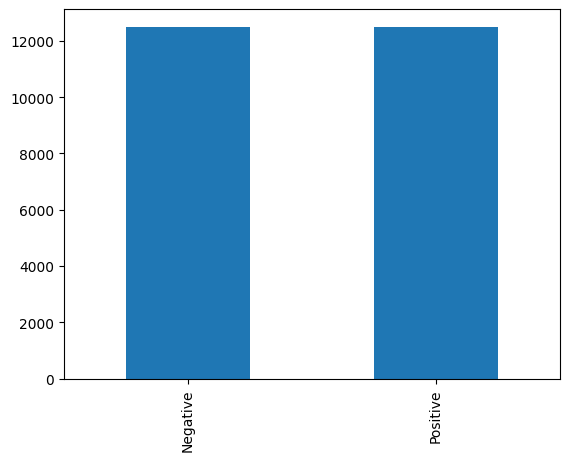

In [7]:
label_df.value_counts().plot(kind='bar')
plt.show()

In [8]:
X

1049     this movie seems to have a lot of people sayin...
9301     the national gallery of art showed the long th...
5754     not for people without swift mind or without a...
20331    an our gang comedy short br br the gang coerce...
9901     it takes a very special kind of person to make...
                               ...                        
12630    yes this movie has kids going to space camp an...
5370     the van is a simple teensploitation picture ma...
6429     there s no denying the first azumi film was a ...
3338     before i go on i have to admit to being a huge...
17716    this movie could have been very good but comes...
Name: clean_text, Length: 25000, dtype: object

In [17]:
np.where(y == 1)[0]

array([    1,     2,     3, ..., 24989, 24993, 24996], dtype=int64)

In [45]:
lab_samples = dict((label, []) for label in inverted_label_mapping.values())
n_samples = 2
for label in inverted_label_mapping:
    lab_samples[inverted_label_mapping[label]] = [X.values[index] for index in np.random.choice(np.where(y == label)[0], n_samples)]

In [46]:
lab_samples

{'Negative': ['warning spoilers contained herein br br this is a semi autobiographical look at what might happen to madonna if she were ever to be stranded on a deserted island there s absolutely no challenge to madonna in this role and it shows she s just madonna playing madonna and she can t even get that right i know what you re saying you re saying how do you know this is what madonna is really like you ve never met her correct i haven t but we all remember truth or dare don t we i know kevin costner does br br you would think in the year 2002 that madonna might have learned something one way or the other from the crossover ladies that have also made their way across the silver screen for goodness sake hasn t madonna seen glitter mariah carey showed the film world how it is done mariah kicks madonna s trashy butt to the curb in beauty talent screen presence charisma characterization you name it all we see from this glimpse into madonna s world is she s the only one in it br br if t